<a href="https://colab.research.google.com/github/PratikGadekar-creator/Customer_Behaviour_Analysis/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df=pd.read_csv(r"/content/netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [52]:

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


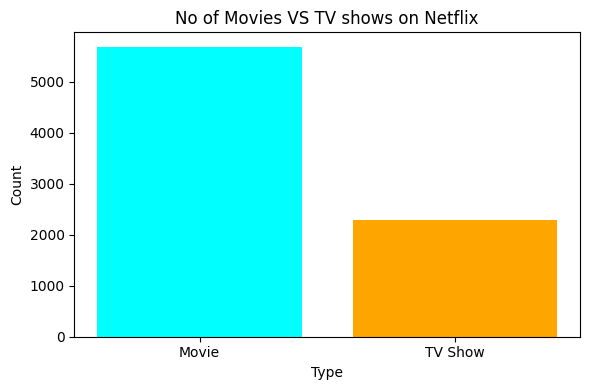

In [53]:
df= df.dropna(subset=['type','release_year','rating','country','duration'])
type_counts=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['cyan','orange'])
plt.title('No of Movies VS TV shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Movies_vs_tv_shows.png')
plt.show()

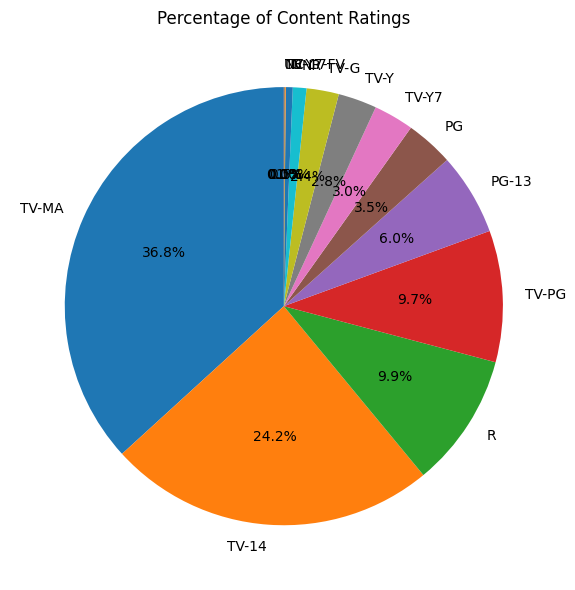

In [54]:
rating_counts=df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels=rating_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Percentage of Content Ratings')
plt.tight_layout()
plt.savefig("Content_rating_pie.png")
plt.show()

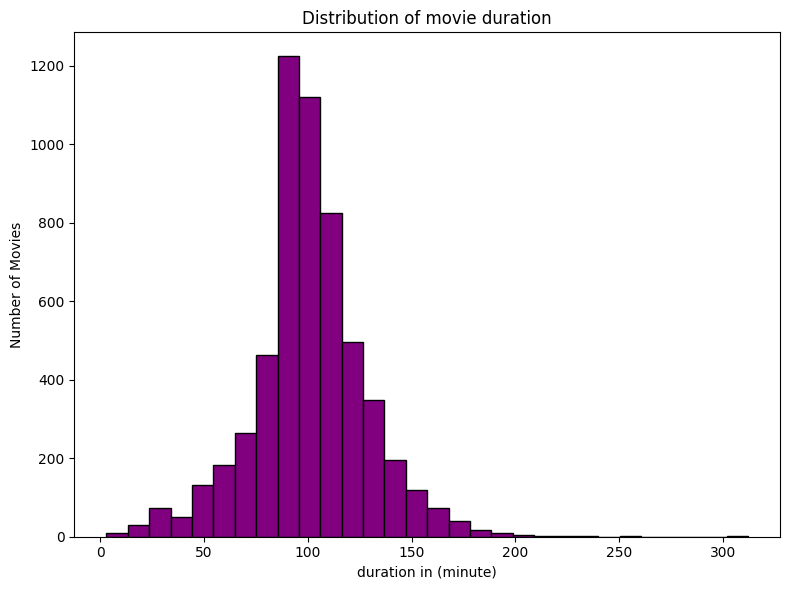

In [55]:
movies_df=df[df['type']=='Movie'].copy()
movies_df['duration_int']=movies_df['duration'].str.replace('min','').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movies_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title('Distribution of movie duration')
plt.xlabel('duration in (minute)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()

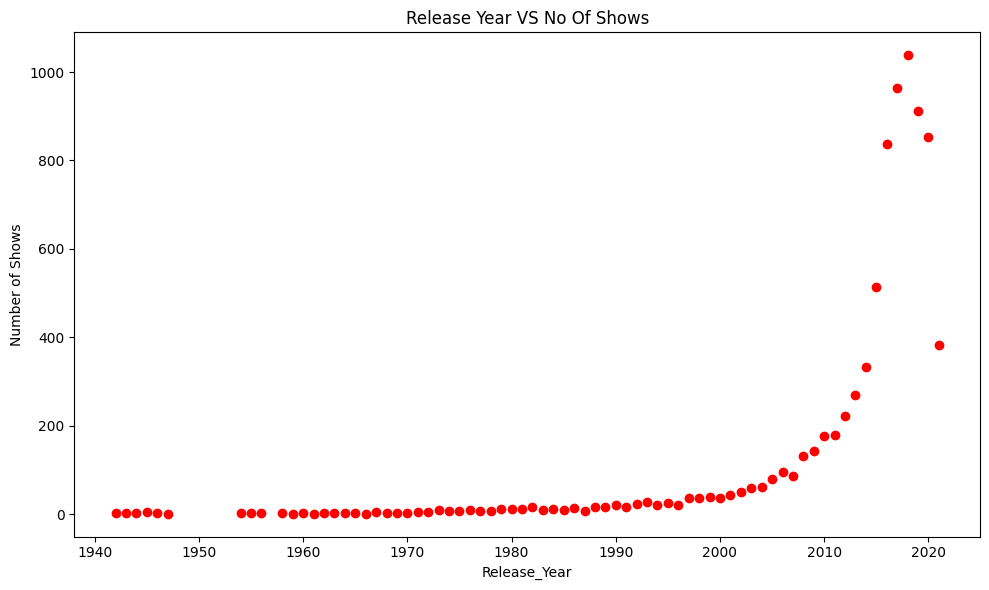

In [56]:
import numpy as np
release_year=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_year.index,release_year.values,color='red')
plt.title('Release Year VS No Of Shows')
plt.xlabel('Release_Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_Scatter.png')
plt.show()

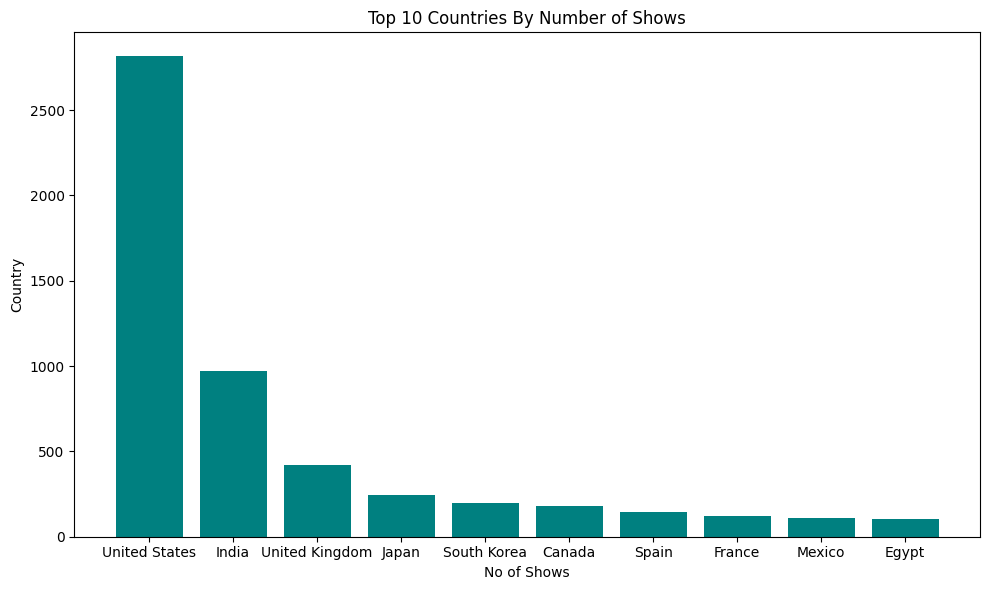

In [57]:
country_counts=df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.bar(country_counts.index,country_counts.values,color='teal')
plt.title('Top 10 Countries By Number of Shows')
plt.xlabel('No of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top 10 country.png')
plt.show()

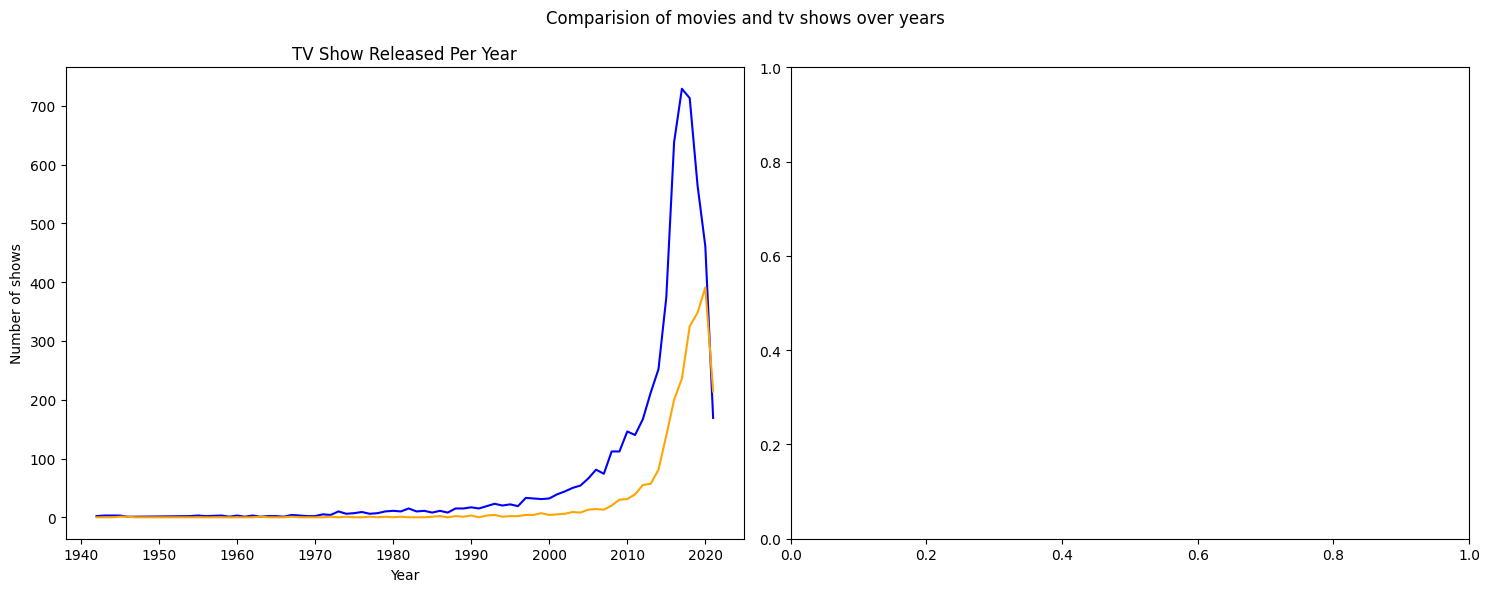

In [58]:
content_by_year=df.groupby(['release_year','type']).size().unstack().fillna(0)
fig ,ax=plt.subplots(1,2,figsize=(15,6))
ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#second subplot


ax[0].plot(content_by_year.index,content_by_year['TV Show'],color='orange')
ax[0].set_title('TV Show Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of shows')

plt.suptitle('Comparision of movies and tv shows over years')
plt.tight_layout()
plt.savefig('content_by_year.png')
plt.show()

